In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [71]:
dataset = pd.read_excel('Polynomial_fish_dataset.xlsx')

In [72]:
dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [73]:
dataset.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
105,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662


In [74]:
df1 = dataset

df1.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [75]:
df1.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

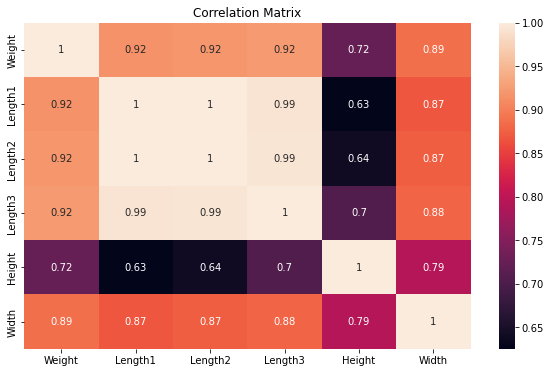

In [76]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

In [77]:
df2 = df1.drop(['Length1', 'Length2', 'Length3'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head(3)

New dimension of dataset is=  (159, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961


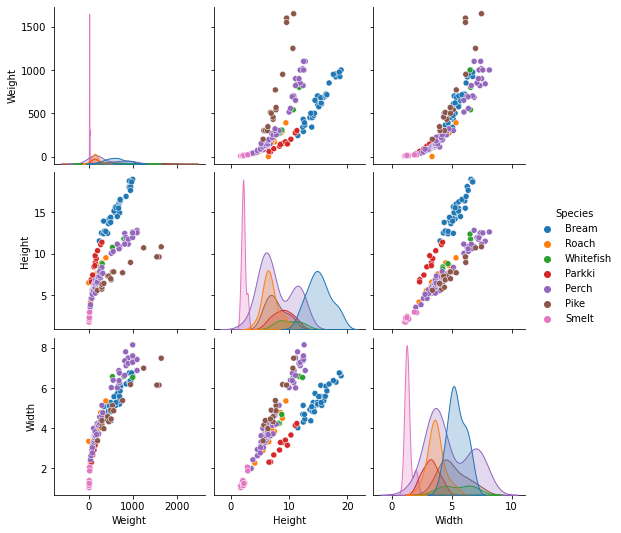

In [78]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

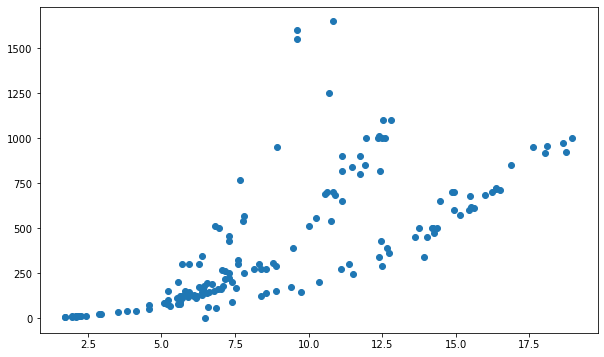

In [82]:
x = df2.iloc[:,2].to_numpy()
y = df2.iloc[:,1].to_numpy()
plt.scatter(x,y )

In [84]:
lm = LinearRegression()
lm.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

Text(0.5, 0, 'Predictor')

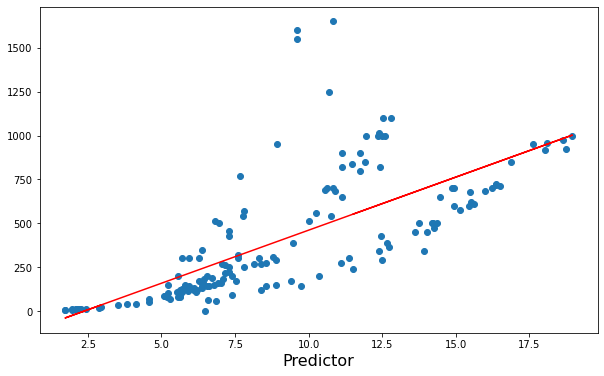

In [89]:
y_pred = lm.predict(x.reshape(-1,1))
y_pred
# # plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x,y_pred, color='r')
plt.xlabel('Predictor', fontsize=16)

In [90]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 246.02628173377173


In [92]:
Input=[('polynomial', PolynomialFeatures(degree=2)),('modal', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x.reshape(-1,1), y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

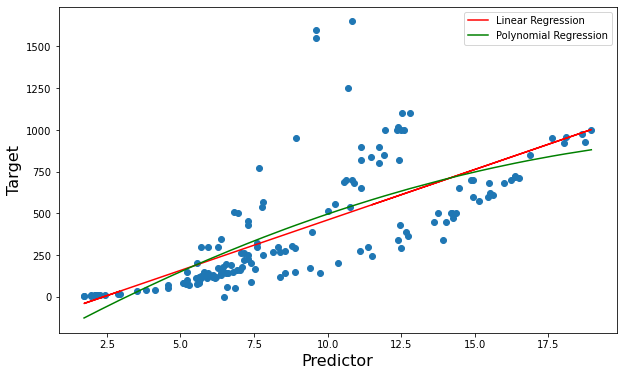

In [93]:
poly_pred = pipe.predict(x.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y)

plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g', label='Polynomial Regression')

plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.legend()
plt.show()